# Training phase

## Setting up the configuration
Fisrt let's check the configuration parameters in case you want to change some of them.


In [1]:
from imgclas import config

config.print_conf_table()

group                    key                           value                         
augmentation             train_mode                    {'h_flip': 1.0, 'v_flip': 0.0, 'rot': 0.5, 'rot_lim': 15, 'stretch': 0.0, 'crop': 1.0, 'zoom': 0.0, 'blur': 0.1, 'pixel_noise': 0.1, 'pixel_sat': 0.1, 'cutout': 0.0} 

augmentation             val_mode                      {'h_flip': 1.0, 'v_flip': 0.0, 'rot': 0.5, 'rot_lim': 15, 'stretch': 0.0, 'crop': 1.0, 'zoom': 0.0, 'blur': 0.1, 'pixel_noise': 0.1, 'pixel_sat': 0.1, 'cutout': 0.0} 

---------------------------------------------------------------------------

dataset                  mean_RGB                      None            

dataset                  std_RGB                       None            

---------------------------------------------------------------------------

general                  base_directory                .               

general                  images_directory              /               

----------------------

In case you want to change the configuration feel free to do so by modifying `etc/config.yaml`.

## Training

Once you have set up the configuration if needed you can launch the training by running the file `train_runfile.py`

#### Tips: 
* If you are running several times different training configurations but with the **same** dataset you might consider to add the `mean_RGB` and `std_RGB` parameters to your `config.yaml` file. You can find them computed in any of your already trained models by looking into `../models/[timestamp]/conf/conf.txt`.

## Visualizing the training results

### Display a single timestamp

Total training time: 2:40:38


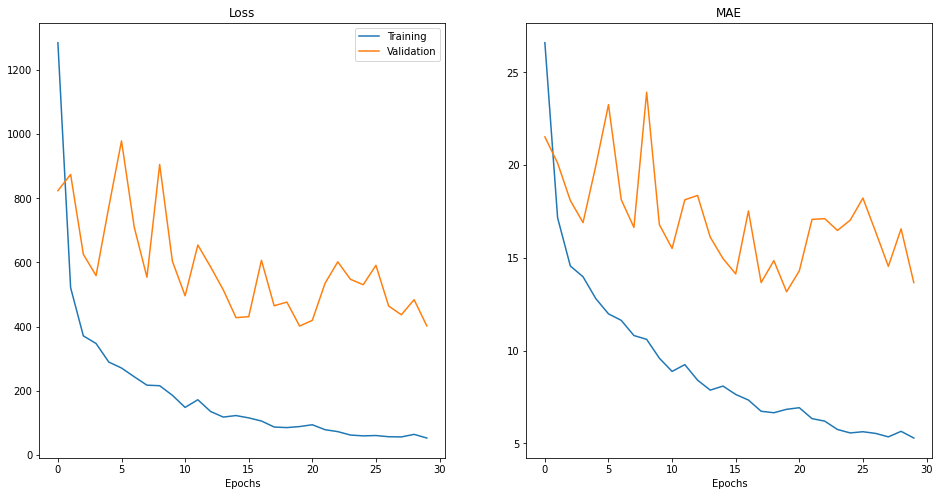

In [2]:
import os
import json
from datetime import timedelta

import matplotlib.pylab as plt
import numpy as np

from imgclas import paths, plot_utils

# User parameters to set
TIMESTAMP = '2022-09-20_OnlyCuasi'             # timestamp of the model

# Set the timestamp
paths.timestamp = TIMESTAMP

# Load training statistics
stats_path = os.path.join(paths.get_stats_dir(), 'stats.json')
with open(stats_path) as f:
    stats = json.load(f)

# Load training configuration
conf_path = os.path.join(paths.get_conf_dir(), 'conf.json')
with open(conf_path) as f:
    conf = json.load(f)

# Plot the trainig plots 
plot_utils.training_plots(conf, stats)

# Print total training time
tr_time = int(stats['training time (s)'])
print('Total training time: {}'.format(timedelta(seconds=tr_time)))

In [3]:
stats['mean_absolute_error'][-1] # accuracy last epoch train

5.290383338928223

In [4]:
stats['val_mean_absolute_error'][-1] # acc last epoch val

13.66812801361084

In [5]:
stats['loss'][-1] # el loss es el mse

52.911084372663986

In [6]:
import math
math.sqrt(stats['loss'][-1])

7.27400057551991

In [7]:
stats['val_loss'][-1] # el loss es el mse

402.234383719308

In [8]:
math.sqrt(stats['val_loss'][-1])

20.055781802744765

In [11]:
stats['epoch'][-1]

29

In [9]:
stats.keys()

dict_keys(['epoch', 'loss', 'lr', 'mean_absolute_error', 'timestamp', 'training time (s)', 'val_loss', 'val_mean_absolute_error'])

### Compare between multiple timestamps

In [5]:
pwd

'/srv/image-classification-tf'

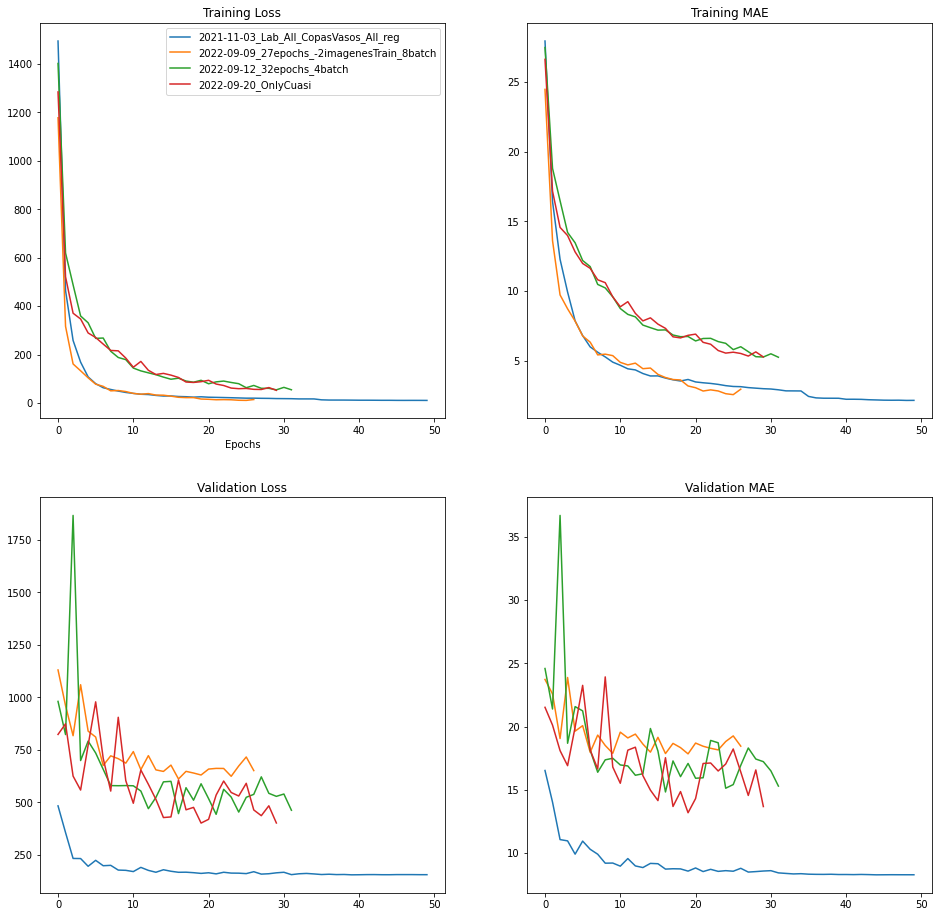

In [10]:
from imgclas.plot_utils import multi_training_plots

TIMESTAMPS = ['2021-11-03_Lab_All_CopasVasos_All_reg',
             '2022-09-09_27epochs_-2imagenesTrain_8batch',
             '2022-09-12_32epochs_4batch',
             '2022-09-20_OnlyCuasi']

multi_training_plots(timestamps=TIMESTAMPS)